In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *
from dataset import *
from data_module import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset_strat.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[316, 319, 511, 519]]",1,0
1,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3535, 2440, 3740, 2639]]",1,0
2,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3530, 329, 3725, 524]]",1,0
3,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,1512,2016,Bolt,"[[1286, 1244, 1383, 1344], [218, 123, 315, 223...",1,0
4,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[292, 2510, 491, 2704]]",1,0
...,...,...,...,...,...,...,...
179,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[346, 2465, 546, 2659]]",1,4
180,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3520, 2435, 3720, 2629]]",1,4
181,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3540, 414, 3745, 608], [3560, 1711, 3755, 19...",1,4
182,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[1429, 419, 1629, 613], [331, 1092, 536, 1297...",1,4


In [6]:
df["bboxes"] = df["bboxes"].apply(eval)

In [7]:
test_dataset = BoltDataset(df, get_valid_transforms(), 'train')

In [8]:
test_dataset[0]

(tensor([[[1.6153, 1.5810, 1.6324,  ..., 1.6838, 1.6495, 1.6495],
          [1.5982, 1.5810, 1.6153,  ..., 1.6667, 1.6495, 1.6838],
          [1.6324, 1.6324, 1.6324,  ..., 1.6495, 1.6838, 1.6667],
          ...,
          [1.5810, 1.5468, 1.5468,  ..., 1.7180, 1.7352, 1.7352],
          [1.5468, 1.5810, 1.5297,  ..., 1.7180, 1.7180, 1.7180],
          [1.5639, 1.5639, 1.5468,  ..., 1.7180, 1.7180, 1.7009]],
 
         [[1.8333, 1.8508, 1.8683,  ..., 1.9559, 1.9559, 1.8859],
          [1.8333, 1.8158, 1.8683,  ..., 1.9384, 1.9559, 1.9559],
          [1.8683, 1.8508, 1.8683,  ..., 1.9209, 1.9384, 1.9209],
          ...,
          [1.7983, 1.7983, 1.8158,  ..., 1.9559, 1.9734, 1.9734],
          [1.7633, 1.8333, 1.7808,  ..., 1.9909, 1.9559, 1.9559],
          [1.7983, 1.7983, 1.7983,  ..., 1.9734, 1.9559, 1.9559]],
 
         [[2.1171, 2.1346, 2.1520,  ..., 2.2566, 2.2217, 2.1520],
          [2.1694, 2.0997, 2.1520,  ..., 2.2217, 2.2566, 2.1868],
          [2.1520, 2.1346, 2.1520,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


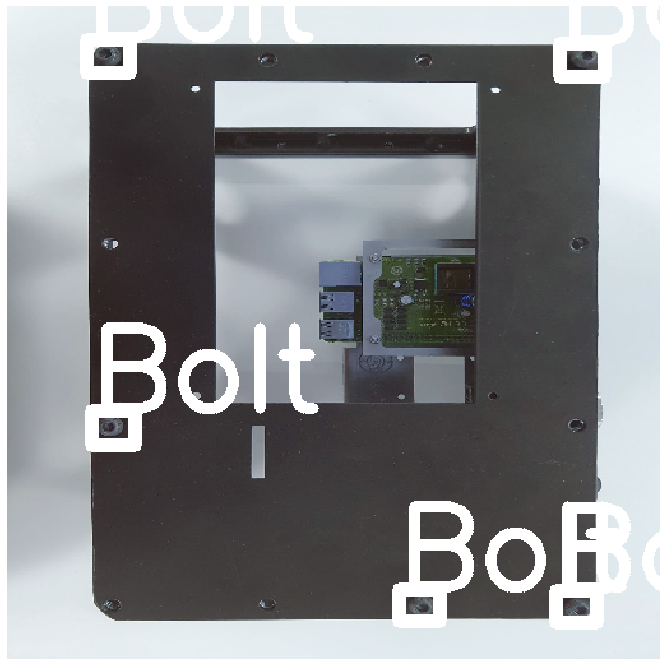

In [9]:
test_dataset.show_data(5)

In [10]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=512),
                             get_valid_transforms(target_img_size=512),
                             num_workers=16,
                             bs=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


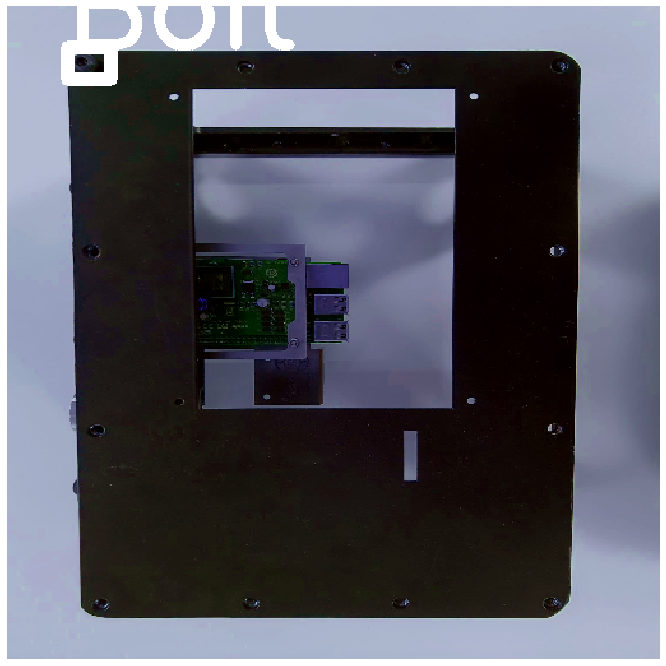

In [11]:
bolt_module.train_dataset().show_data(13)

In [12]:
loader = bolt_module.train_dataloader()

In [13]:
len(loader)

55

In [14]:
images, annotations, targets, bolts = next(iter(loader))

In [15]:
targets

[{'bboxes': tensor([[423.5415, 277.5824, 462.6848, 306.9399],
          [367.4665,  14.8125, 405.3713,  42.8076],
          [337.2526, 428.6940, 375.2735, 457.3181],
          [144.7214,  42.5115, 182.0715,  71.0658],
          [103.5416, 456.1806, 141.5626, 484.8047],
          [ 77.9160, 317.3549, 116.7755, 346.0661],
          [ 54.2906, 184.9054,  92.1954, 212.9006]]),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1]),
  'bolts': 1,
  'img_size': [512, 512],
  'img_scale': tensor([1.])},
 {'bboxes': tensor([[ 26.4689,  84.2929,  52.8005, 120.6437],
          [ 34.8648, 198.4492,  62.2092, 234.9083],
          [ 41.6202, 310.9320,  68.2050, 347.3099],
          [ 48.2335, 420.9708,  74.7372, 455.9985],
          [176.8874, 403.8277, 203.5331, 441.2183],
          [307.9829, 397.5531, 335.1852, 431.6494],
          [431.4398, 154.0392, 458.7638, 190.1607],
          [440.0889, 268.4661, 465.5800, 303.3856],
          [444.9910, 379.5175, 472.3961, 416.9892],
          [289.8630,  53.6645, 31